**This project consist of a Jupyter notebook that 1)Scrapes PokemonDB for the data of all pokemon thus far, 2)outputs the data to a CSV file, and 3) create data visualizations with said data.**

**1. Import everything we need.**

In [1]:
from requests import get #For creating response objects
from bs4 import BeautifulSoup #For creating beutifulsoup objects
import pandas as pd #For creating dataframes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import re
reload(sys)
sys.setdefaultencoding('utf-8')
%matplotlib inline

**2. Create a response object and check status of url. 200 = Connection is good.**

In [2]:
url = 'https://pokemondb.net/pokedex/all'
response = get(url)
response.status_code

200

**3. Create a bs4 soup object using BeautifulSoup, and passing in our response object + 'lxml' parser.**

In [3]:
soup = BeautifulSoup(response.content, 'lxml')
type(soup)

bs4.BeautifulSoup

**4. Create a rows variable to store all the table rows.<br>
If the website had multiple tables or other 'tr' classes, we would have to create a container to<br>
hold all the rows and then create a rows variable by using find_all on container. In this case,<br> 
there is only one table that holds all the 'tr' tags.**

In [4]:
rows = soup.find_all('tr')

**5. Create empty lists of each column, and itterate through the rows variable skipping the first one ([1:]) <br>
a) Set 'col' variable to all the 'td' tags contained in each row in rows.<br>
b) Set each column to its appropriate name, get the text, and then append it to the appropriate<br> 
empty list.<br>
6.Create a list for the average of all stats of each pokemon by converting the list of totals in<br> integers and dividing by 6.**

In [5]:
numbers = []
names = []
types = []
hps = []
attacks = []
defenses = []
sp_attks = []
sp_defs = []
speeds = []
totals = []
st_avgs = []

for row in rows[1:]:
    col = row.find_all('td')
    
    num = col[0].text
    numbers.append(num)
   
    name = col[1].text
    names.append(name)
    
    poke_type = col[2].text
    types.append(poke_type)
    
    hp = col[4].text
    hps.append(hp)
    
    attack = col[5].text
    attacks.append(attack)
    
    defense = col[6].text
    defenses.append(defense)
    
    spa = col[7].text
    sp_attks.append(spa)
    
    spd = col[8].text
    sp_defs.append(spd)
    
    speed = col[9].text
    speeds.append(speed)
    
    total = col[3].text
    totals.append(total)
    
    st_avg = int(col[3].text)/6
    st_avgs.append(st_avg)

**6. Create Pandas DataFrame using the lists of data scraped from website, by entering the lists into pandas as a dictionary.**

In [6]:
poke_df = pd.DataFrame({'NationalNo':numbers,
                        'Name':names,
                        'Type':types,
                        'HP':hps,
                        'Attack':attacks,
                        'Defense':defenses,
                        'Sp_Atk':sp_attks,
                        'Sp_Def':sp_defs,
                        'Speed':speeds,
                        'Total':totals, 
                        'Stat_Avg':st_avgs,
                       })

**7. Output the first five records with .head()**

In [7]:
poke_df.head()

,Attack,Defense,HP,Name,NationalNo,Sp_Atk,Sp_Def,Speed,Stat_Avg,Total,Type
0,49,49,45,Bulbasaur,001,65,65,45,53,318,Grass Poison
1,62,63,60,Ivysaur,002,80,80,60,67,405,Grass Poison
2,82,83,80,Venusaur,003,100,100,80,87,525,Grass Poison
3,100,123,80,Venusaur Mega Venusaur,003,122,120,80,104,625,Grass Poison
4,52,43,39,Charmander,004,60,50,65,51,309,Fire


**8. Output the last five records with .tail()**

In [8]:
poke_df.tail()

,Attack,Defense,HP,Name,NationalNo,Sp_Atk,Sp_Def,Speed,Stat_Avg,Total,Type
1024,130,115,92,Zacian Hero of Many Battles,888,80,115,138,111,670,Fairy
1025,130,145,92,Zamazenta Crowned Shield,889,80,145,128,120,720,Fighting Steel
1026,130,115,92,Zamazenta Hero of Many Battles,889,80,115,138,111,670,Fighting
1027,85,95,140,Eternatus,890,145,95,130,115,690,Poison Dragon
1028,115,250,255,Eternatus Eternamax,890,125,250,130,187,1125,Poison Dragon


**9. Columns seem out of place, so we reoder them.**
- Using df = df[['column0','column1','column2'....'etc']]

In [9]:
poke_df = poke_df[['NationalNo','Name','Type','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Total','Stat_Avg']]

In [10]:
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,Grass Poison,45,49,49,65,65,45,318,53
1,002,Ivysaur,Grass Poison,60,62,63,80,80,60,405,67
2,003,Venusaur,Grass Poison,80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,Grass Poison,80,100,123,122,120,80,625,104
4,004,Charmander,Fire,39,52,43,60,50,65,309,51


**10. Split the primary and secondary types.**

In [11]:
def camelcase_split(string):
    split_string = re.sub('([a-z])([A-Z])', r'\1 \2', string).split()
    return split_string

In [12]:
poke_df['Type'] = poke_df.Type.apply(camelcase_split)

In [13]:
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,[Fire],39,52,43,60,50,65,309,51


**11. Create a function that takes an argument and checks if the length is equal to 1.<br>
If so, it adds a 'None' to the list values, so we have 2 elements in each list.**

In [14]:
def add_none(type_2):
    if len(type_2) == 1:
        type_2.append('None')
    return type_2 

In [15]:
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,[Fire],39,52,43,60,50,65,309,51


**12. Apply Function**

In [16]:
poke_df['Type'] = poke_df.Type.apply(add_none)
poke_df.head()

,NationalNo,Name,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,"[Fire, None]",39,52,43,60,50,65,309,51


**13. We take the 'Type' column of DataFrame and set it equal to a variable. <br>
Then use a for loop to go through each row and add i[0] and i[1] to two seperate lists that we <br>
will use as new columns.**

In [17]:
type1_2 = poke_df['Type']
#split_cols
type_1 = []
type_2 = []
for i in type1_2:
    type_1.append(i[0])
    type_2.append(i[1])

**14. Insert the two new collumns.**

In [18]:
idx = 2
poke_df.insert(loc=idx,column='Type_1',value=type_1)
poke_df.insert(loc=idx,column='Type_2',value=type_2)

In [19]:
poke_df.head()

,NationalNo,Name,Type_2,Type_1,Type,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,Poison,Grass,"[Grass, Poison]",45,49,49,65,65,45,318,53
1,002,Ivysaur,Poison,Grass,"[Grass, Poison]",60,62,63,80,80,60,405,67
2,003,Venusaur,Poison,Grass,"[Grass, Poison]",80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,Poison,Grass,"[Grass, Poison]",80,100,123,122,120,80,625,104
4,004,Charmander,None,Fire,"[Fire, None]",39,52,43,60,50,65,309,51


**15. Final Reorder. Let's format names with "Mega" while were at it**

In [20]:
poke_df = poke_df[['NationalNo','Name','Type','Type_1','Type_2','HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Total','Stat_Avg']]
poke_df.head()

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",Grass,Poison,45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",Grass,Poison,60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",Grass,Poison,80,82,83,100,100,80,525,87
3,003,Venusaur Mega Venusaur,"[Grass, Poison]",Grass,Poison,80,100,123,122,120,80,625,104
4,004,Charmander,"[Fire, None]",Fire,None,39,52,43,60,50,65,309,51


In [21]:
poke_df['Prev Name'] = poke_df['Name'].shift(fill_value='')

def get_name(row):
    name = row['Name']
    prev_name = row['Prev Name']
    if name.startswith(prev_name):
        return name[len(prev_name):]
    return name

poke_df['Name'] = poke_df.apply(get_name, axis=1)
poke_df.drop(columns='Prev Name', inplace=True)
poke_df.head()

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",Grass,Poison,45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",Grass,Poison,60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",Grass,Poison,80,82,83,100,100,80,525,87
3,003,Mega Venusaur,"[Grass, Poison]",Grass,Poison,80,100,123,122,120,80,625,104
4,004,Charmander,"[Fire, None]",Fire,None,39,52,43,60,50,65,309,51


**Optional: Remove the origional 'Type' column.**

In [22]:
#poke_df.drop('Type', axis=1, inplace=True)

**16. Export as CSV. Use "encoding='utf-8" to remove the 'u' from the Type list.**

In [23]:
poke_df.to_csv('poke_data.csv', encoding='utf-8')

In [24]:
poke_df.head()

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
0,001,Bulbasaur,"[Grass, Poison]",Grass,Poison,45,49,49,65,65,45,318,53
1,002,Ivysaur,"[Grass, Poison]",Grass,Poison,60,62,63,80,80,60,405,67
2,003,Venusaur,"[Grass, Poison]",Grass,Poison,80,82,83,100,100,80,525,87
3,003,Mega Venusaur,"[Grass, Poison]",Grass,Poison,80,100,123,122,120,80,625,104
4,004,Charmander,"[Fire, None]",Fire,None,39,52,43,60,50,65,309,51


**17. How would the dataframe look if ordered by total stats, greatest to least?**

In [25]:
poke_df.sort_values('Total', ascending=False)

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
459,384,Mega Rayquaza,"[Dragon, Flying]",Dragon,Flying,105,180,100,180,100,115,780,130
191,150,Mewtwo Mega Mewtwo Y,"[Psychic, None]",Psychic,None,106,150,70,194,120,140,780,130
190,150,Mega Mewtwo X,"[Psychic, Fighting]",Psychic,Fighting,106,190,100,154,100,130,780,130
455,382,Primal Kyogre,"[Water, None]",Water,None,100,150,90,180,160,90,770,128
457,383,Primal Groudon,"[Ground, Fire]",Ground,Fire,100,180,160,150,90,90,770,128
931,800,Necrozma Ultra Necrozma,"[Psychic, Dragon]",Psychic,Dragon,97,167,97,167,97,129,754,125
1023,888,Zacian Crowned Sword,"[Fairy, Steel]",Fairy,Steel,92,170,115,80,115,148,720,120
1025,889,Zamazenta Crowned Shield,"[Fighting, Steel]",Fighting,Steel,92,130,145,80,145,128,720,120
585,493,Arceus,"[Normal, None]",Normal,None,120,120,120,120,120,120,720,120
836,718,Zygarde Complete Forme,"[Dragon, Ground]",Dragon,Ground,216,100,121,91,95,85,708,118


**18. Let's turn all numeric columns into integer data types.**

In [26]:
poke_df['HP'] = poke_df.HP.astype(int)
poke_df['Attack'] = poke_df.Attack.astype(int)
poke_df['Sp_Atk'] = poke_df.Sp_Atk.astype(int)
poke_df['Defense'] = poke_df.Defense.astype(int)
poke_df['Sp_Def'] = poke_df.Sp_Def.astype(int)
poke_df['Speed'] = poke_df.Speed.astype(int)
poke_df['Total'] = poke_df.Total.astype(int)
poke_df['Stat_Avg'] = poke_df.Stat_Avg.astype(int)

**19. Plot a Histogram that shows the distribution of total pokemon stats including labels. Divide the data into 128 bins.**

(array([ 3.,  1.,  5.,  5.,  9.,  3.,  5.,  1.,  7.,  8., 14.,  8., 16.,
         9., 16., 17., 34., 29., 32., 19., 30., 13., 14., 12., 14.,  8.,
         9.,  6., 15.,  6., 34., 17.,  8., 32., 10., 20.,  4., 27., 21.,
        25., 26., 51., 38., 55., 20., 27., 20., 40., 15., 13.,  2.,  4.,
         2., 15., 24.,  3.,  1., 45.,  2.,  4.,  2.,  7.,  2.,  0.,  0.,
         1.,  6.,  0., 17.,  1.,  9.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,
         1.,  0.,  2.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 175.      ,  182.421875,  189.84375 ,  197.265625,  204.6875  ,
         212.109375,  219.53125 ,  226.953125,  234.375   ,  241.796875,
         249.21875 ,  256.640625,  264.0625  ,  271.484375,  278.90625 ,
         286.328125,  293.75    ,  301.171875,  308.59375 ,

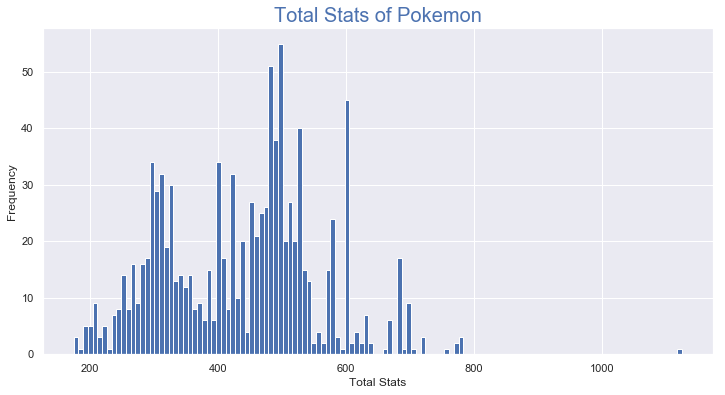

In [27]:
sns.set()
plt.figure(figsize=(12,6))
plt.title("Total Stats of Pokemon", fontsize=20, color= 'b')
plt.xlabel('Total Stats')
plt.ylabel('Frequency')

plt.hist(poke_df['Total'],bins=128)

**20. Plot a Histogram that shows the distribution of frequency of pokemon Hit Points including labels. divede the data in 64 bins.**

(array([  1.,   0.,   2.,   0.,   6.,   0.,   6.,  17.,  18.,  62.,  20.,
         58.,  86.,  50., 104.,  23.,  80.,  95.,  74.,  77.,   9.,  30.,
         52.,  28.,  46.,   5.,  23.,  15.,   5.,   5.,   3.,   6.,   3.,
          2.,   2.,   2.,   1.,   4.,   0.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.]),
 array([  1.     ,   4.96875,   8.9375 ,  12.90625,  16.875  ,  20.84375,
         24.8125 ,  28.78125,  32.75   ,  36.71875,  40.6875 ,  44.65625,
         48.625  ,  52.59375,  56.5625 ,  60.53125,  64.5    ,  68.46875,
         72.4375 ,  76.40625,  80.375  ,  84.34375,  88.3125 ,  92.28125,
         96.25   , 100.21875, 104.1875 , 108.15625, 112.125  , 116.09375,
        120.0625 , 124.03125, 128.     , 131.96875, 135.9375 , 139.90625,
        143.875  , 147.84375, 151.8125 , 155.78125, 159.75   , 163.71875,
        167.6875 , 171.65625, 175.625  , 179.593

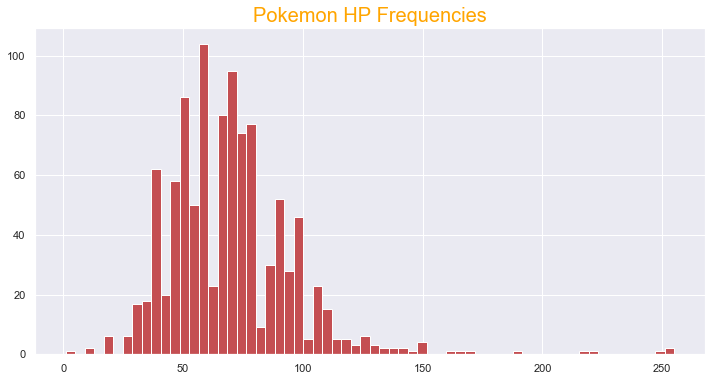

In [28]:
plt.figure(figsize=(12,6))
plt.title("Pokemon HP Frequencies", fontsize=20,color='Orange')
plt.hist(poke_df['HP'],color='r',bins=64)

**21. Plot a bar graph that shows the total number of pokemon with each type 1 (primary) category that exists in the data.**

In [29]:
poke_df.Type_1.value_counts()

Water       134
Normal      115
Grass        91
Bug          81
Psychic      77
Fire         65
Electric     61
Rock         60
Dark         44
Ghost        41
Ground       41
Dragon       40
Poison       39
Fighting     38
Steel        36
Ice          36
Fairy        22
Flying        8
Name: Type_1, dtype: int64

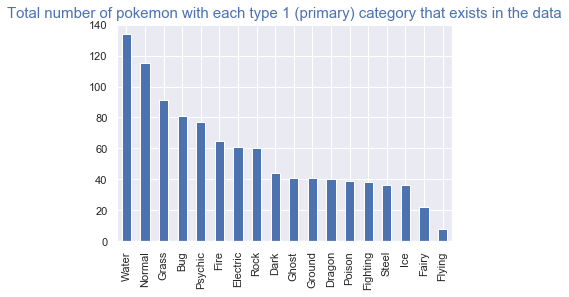

In [30]:
plt.title("Total number of pokemon with each type 1 (primary) category that exists in the data", fontsize=15, color= 'b')
poke_df.Type_1.value_counts().plot.bar()

**19. Refering to the last graph above, We can observe that Ghost, Ground, and Dragon have similar amounts of pokemon. We want to see how their total stats are in comparison to each other.**

Text(0.5,1,'Ground-Dragon-Ghost Total Stats Frequencies')

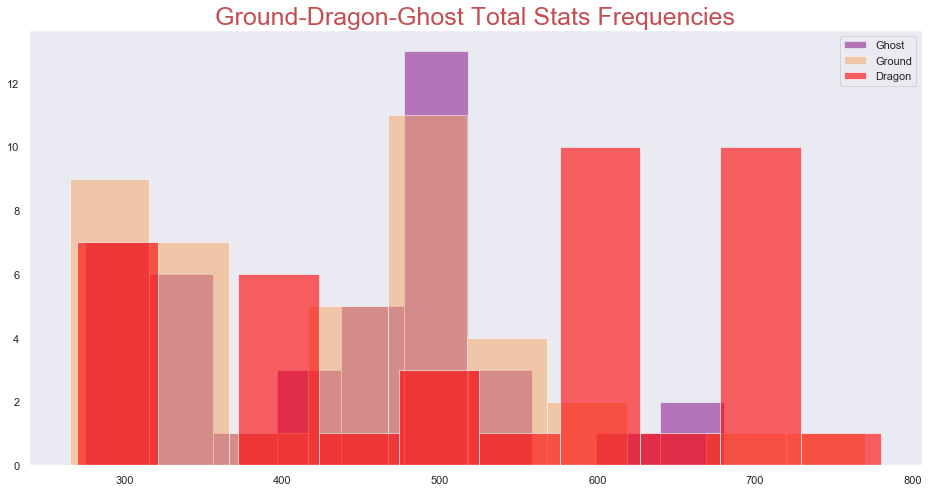

In [31]:
type_ghost = poke_df[poke_df['Type_1'] == 'Ghost']
type_ground = poke_df[poke_df['Type_1'] == 'Ground']
type_dragon = poke_df[poke_df['Type_1'] == 'Dragon']

plt.figure(figsize=(16,8))
plt.grid(False)
plt.hist(type_ghost['Total'], label='Ghost', color = 'purple', alpha=.5)
plt.hist(type_ground['Total'], label='Ground', color = 'sandybrown', alpha=.5)
plt.hist(type_dragon['Total'], label='Dragon', color = 'red', alpha=.6)
plt.legend(loc='upper right')
plt.title("Ground-Dragon-Ghost Total Stats Frequencies", fontsize=25, color='r')

**From this histogram plot we can see the Dragon type_1 holds higher values of total stats than the other two.**

**20. Plot a bar graph that shows the number of pokemon in each PURE type 1 (primary) category that exists in the data.**

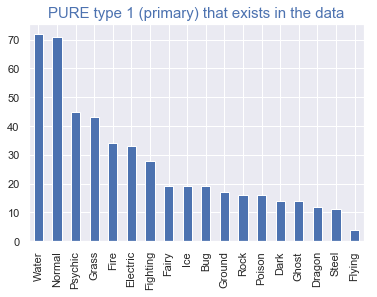

In [32]:
type2_none = poke_df[poke_df['Type_2'] == 'None']
plt.title("PURE type 1 (primary) that exists in the data", fontsize=15, color= 'b')
type2_none.Type_1.value_counts().plot.bar()

**21. Plot a bar graph that shows the total number of pokemon with each type 2 (secondary) category that exists in the data.**

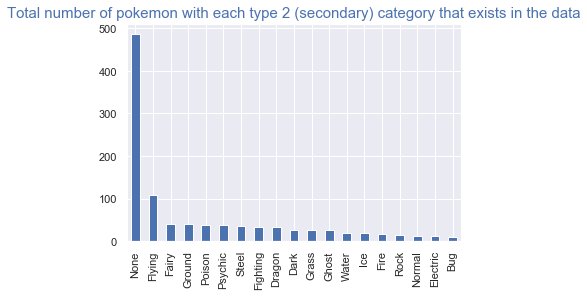

In [33]:
plt.title("Total number of pokemon with each type 2 (secondary) category that exists in the data", fontsize=15, color= 'b')
poke_df.Type_2.value_counts().plot.bar()

**22. Plot a bar graph that shows every combination of types possible in the data**

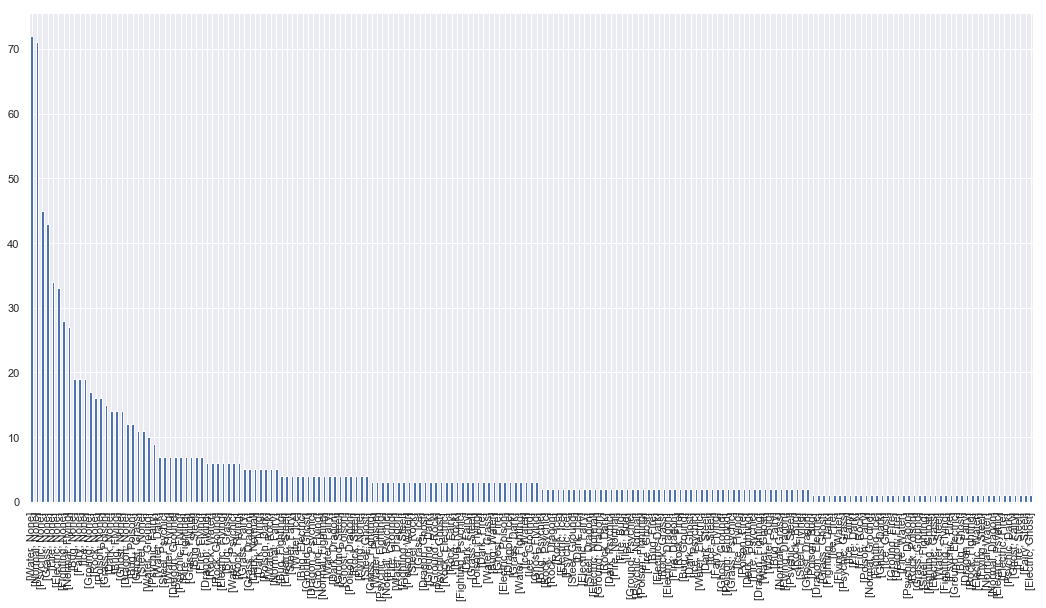

In [34]:
plt.figure(figsize=(18,9))
poke_df.Type.value_counts().plot.bar()

**23. Plot a heatmap to find the Frequency of type combinations using the two categorical data columns type_1 and type_2.**

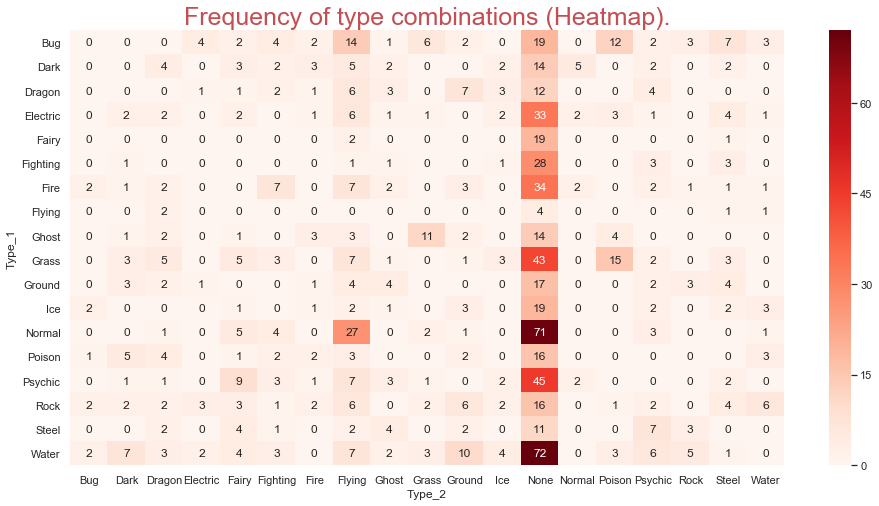

In [35]:
plt.figure(figsize=(16,8))
#flights = poke_df
type_combos = pd.pivot_table(poke_df, 
                         index="Type_1", columns="Type_2", values="Name",
                         aggfunc=lambda x: x.value_counts().count(), fill_value=0)
plt.title("Frequency of type combinations (Heatmap).", fontsize=25, color='r')
sns.heatmap(type_combos,cmap='Reds',annot=True, annot_kws={"size": 12})

**24. Refering to the heatmap above, there appears to be one pokemon whos type is electric/fire. Retirieve the record of<br>
that pokemon.**

In [36]:
poke_df.loc[(poke_df['Type_1'] == "Electric") & (poke_df['Type_2'] == "Fire")]

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
565,479,Heat Rotom,"[Electric, Fire]",Electric,Fire,50,65,107,105,107,86,520,86


**25. Refering to the heatmap above, there appears to be four pokemon whos are purely flying-types. Retirieve the record of
those pokemon.**

In [37]:
poke_df.loc[(poke_df['Type_1'] == "Flying") & (poke_df['Type_2'] == "None")]

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
741,641,Tornadus Incarnate Forme,"[Flying, None]",Flying,None,79,115,70,125,80,111,580,96
742,641,Tornadus Therian Forme,"[Flying, None]",Flying,None,79,100,80,110,90,121,580,96
952,821,Rookidee,"[Flying, None]",Flying,None,38,47,35,33,35,57,245,40
953,822,Corvisquire,"[Flying, None]",Flying,None,68,67,55,43,55,77,365,60


**26. What are the correlation between all stats?**

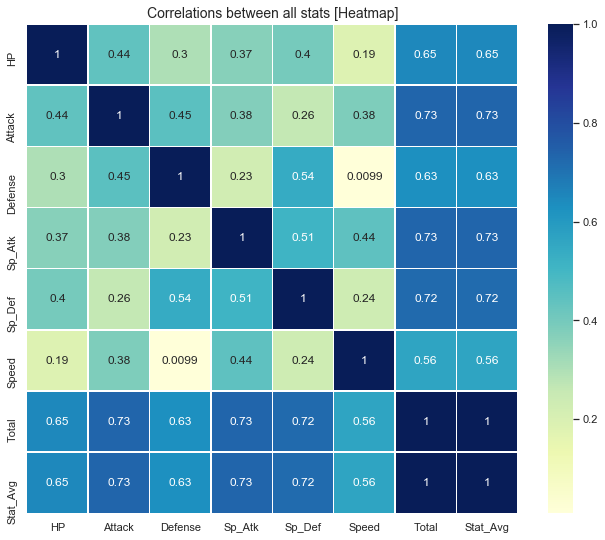

In [38]:
#temp_poke_df = poke_df.drop(["Stat_Avg"], axis = 1)

corrmat = poke_df.corr() 
f, ax = plt.subplots(figsize=(11, 9))

plt.title("Correlations between all stats [Heatmap]", size = 14)
sns.heatmap(corrmat, cmap="YlGnBu",  linewidths=.5,annot=True, annot_kws={"size": 12})

**27. To see what a 1-to-1 correlation looks like, plot "Total" and "Stat Average" columns.**

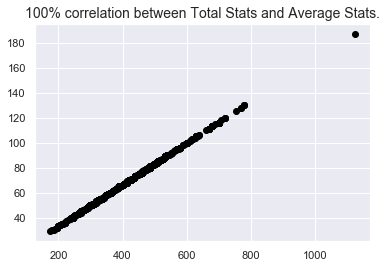

In [39]:
x = poke_df["Total"]
y = poke_df["Stat_Avg"]

plt.title("100% correlation between Total Stats and Average Stats.", size = 14)
plt.plot(x, y, 'o', color='black')

**28. To see what two columns look like at a correlation of 73%, plot 'Total' and 'Sp.Atk' using Seaborn. By default, a linear regression fit is drawn.**

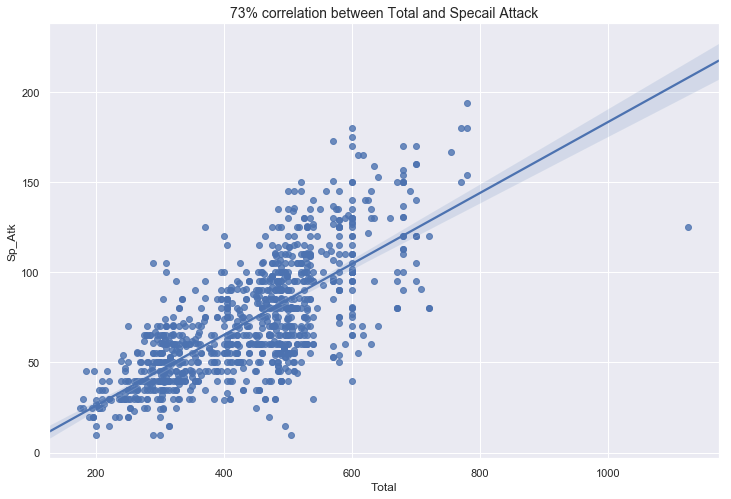

In [40]:
plt.figure(figsize=(12,8))
plt.title("73% correlation between Total and Specail Attack", size = 14)
sns.regplot(x=poke_df["Total"], y=poke_df["Sp_Atk"])

**29. To see a correlation of .9%, plot 'Speed' and 'Defense'.**

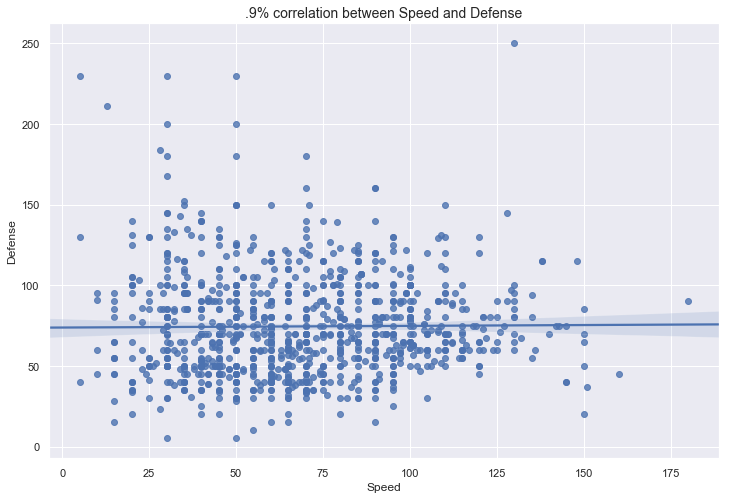

In [41]:
plt.figure(figsize=(12,8))
plt.title(".9% correlation between Speed and Defense", size = 14)
sns.regplot(x=poke_df["Speed"], y=poke_df["Defense"])

**30. Create function that takes in the name one numeric stat column and returns the average of each type of pokemon.**

In [102]:
def AverageByCol(column):
    type_fire = poke_df[poke_df['Type_1'] == 'Fire']
    type_water = poke_df[poke_df['Type_1'] == 'Water']
    type_electric = poke_df[poke_df['Type_1'] == 'Electric']
    type_grass = poke_df[poke_df['Type_1'] == 'Grass']

    type_ghost = poke_df[poke_df['Type_1'] == 'Ghost']
    type_fighting = poke_df[poke_df['Type_1'] == 'Fighting']
    type_rock = poke_df[poke_df['Type_1'] == 'Rock']
    type_dark = poke_df[poke_df['Type_1'] == 'Dark']
    type_bug = poke_df[poke_df['Type_1'] == 'Bug']

    type_normal = poke_df[poke_df['Type_1'] == 'Normal']
    type_fairy = poke_df[poke_df['Type_1'] == 'Fairy']
    type_psychic = poke_df[poke_df['Type_1'] == 'Psychic']
    type_steel = poke_df[poke_df['Type_1'] == 'Steel']
    type_dragon = poke_df[poke_df['Type_1'] == 'Dragon']
    
    
    AVG_type_fire = type_fire[column].mean()
    AVG_type_water = type_water[column].mean()
    AVG_type_electric = type_electric[column].mean()
    AVG_type_grass = type_grass[column].mean()

    AVG_type_ghost = type_ghost[column].mean()
    AVG_type_fighting = type_fighting[column].mean()
    AVG_type_rock = type_rock[column].mean()
    AVG_type_dark = type_dark[column].mean()
    AVG_type_bug = type_bug[column].mean()

    AVG_type_normal = type_normal[column].mean()
    AVG_type_fairy = type_fairy[column].mean()
    AVG_type_psychic = type_psychic[column].mean()
    AVG_type_steel = type_psychic[column].mean()
    AVG_type_dragon = type_psychic[column].mean() 
    
    AVG_df = pd.DataFrame({'Types': ['Fire',"Water", "Electric","Grass",
                                   "Ghost","Fighting","Rock","Dark", "Bug",
                                   "Normal","Fairy","Psychic","Steel","Dragon"],
                          'Averages':[ AVG_type_fire,AVG_type_water,AVG_type_electric,AVG_type_grass,
                                        AVG_type_ghost,AVG_type_fighting,AVG_type_rock,AVG_type_dark,AVG_type_bug,
                                        AVG_type_normal,AVG_type_fairy,AVG_type_psychic,AVG_type_steel,AVG_type_dragon ] 
                         })
    
    return AVG_df.sort_values(by="Averages",ascending=False);

**31. Using the function above, find the averate Hit Points for each type and then graph it.**

In [103]:
AverageByCol(column = "HP")

,Averages,Types
9,77.052174,Normal
10,72.954545,Fairy
11,72.207792,Psychic
12,72.207792,Steel
13,72.207792,Dragon
5,71.394737,Fighting
1,70.888060,Water
0,69.430769,Fire
7,68.818182,Dark
6,67.100000,Rock


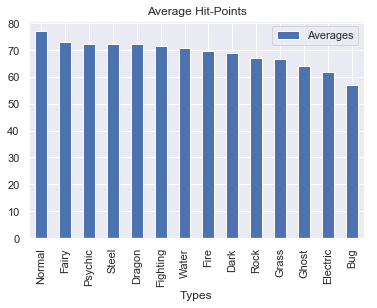

In [104]:
AverageByCol(column = "HP").plot(kind='bar',x='Types',y='Averages', title="Average Hit-Points")

**32. Using the function above, find the averate Attack for each type and then graph it.**

In [105]:
AverageByCol(column = "Attack")

,Averages,Types
5,101.263158,Fighting
6,91.783333,Rock
0,85.400000,Fire
7,81.000000,Dark
9,75.260870,Normal
1,74.992537,Water
3,74.813187,Grass
11,74.805195,Psychic
12,74.805195,Steel
13,74.805195,Dragon


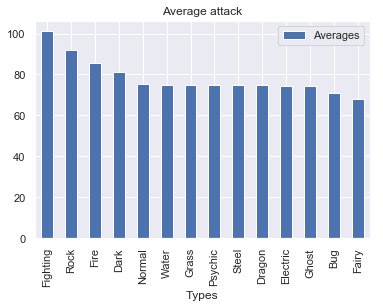

In [106]:
AverageByCol(column = "Attack").plot(kind='bar',x='Types',y='Averages',title="Average attack")

**33. Using the function above, find the average speed for each type and then graph it.**

In [107]:
AverageByCol(column = "Speed")

,Averages,Types
2,84.901639,Electric
11,79.740260,Psychic
12,79.740260,Steel
13,79.740260,Dragon
7,75.750000,Dark
0,74.369231,Fire
9,69.678261,Normal
5,69.210526,Fighting
1,66.335821,Water
8,63.259259,Bug


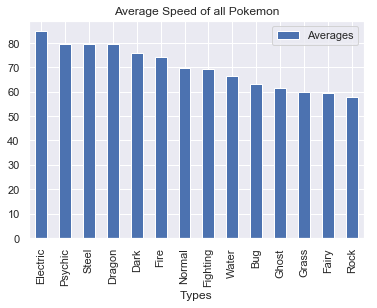

In [129]:
AverageByCol(column = "Speed").plot(kind='bar',x='Types',y='Averages', title="Average Speed of all Pokemon")

**34. Using the function above, find the average special defense for each type and then graph it.**

In [109]:
AverageByCol(column = "Sp_Def")

,Averages,Types
10,89.181818,Fairy
11,87.103896,Psychic
12,87.103896,Steel
13,87.103896,Dragon
4,78.780488,Ghost
6,72.800000,Rock
2,72.016393,Electric
1,71.395522,Water
0,71.292308,Fire
3,70.054945,Grass


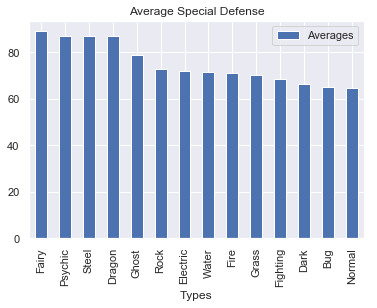

In [130]:
AverageByCol(column = "Sp_Def").plot(kind='bar',x='Types',y='Averages',title="Average Special Defense")

**35. Using the function above, find the average stat totals for each type and then graph it.**

In [111]:
AverageByCol(column = "Total")

,Averages,Types
11,483.103896,Psychic
12,483.103896,Steel
13,483.103896,Dragon
0,455.015385,Fire
2,449.327869,Electric
6,448.683333,Rock
4,440.756098,Ghost
10,439.272727,Fairy
5,439.052632,Fighting
1,431.738806,Water


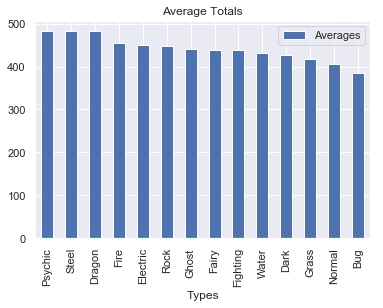

In [112]:
AverageByCol(column = "Total").plot(kind='bar',x='Types',y='Averages',title="Average Totals")

**36. Using the function above, find the average stat average for each type and then graph it.**

In [113]:
AverageByCol(column = "Stat_Avg")

,Averages,Types
11,80.155844,Psychic
12,80.155844,Steel
13,80.155844,Dragon
0,75.446154,Fire
2,74.426230,Electric
6,74.416667,Rock
4,73.024390,Ghost
10,72.772727,Fairy
5,72.736842,Fighting
1,71.582090,Water


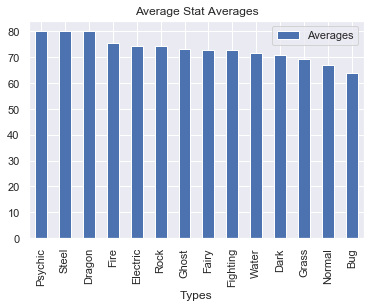

In [114]:
AverageByCol(column = "Stat_Avg").plot(kind='bar',x='Types',y='Averages', title="Average Stat Averages")

**37. Create function that takes in the name of a type (type_1 primary) and returns the average stats of pokemon of that type.**

In [115]:
def AverageOfType1(type1):
    
    typeFiltered_poke_df = poke_df.loc[(poke_df['Type_1'] == type1)]
                         
    AVG_HP = typeFiltered_poke_df["HP"].mean()
    AVG_Attack = typeFiltered_poke_df["Attack"].mean()
    AVG_Defense = typeFiltered_poke_df["Defense"].mean()
    AVG_Sp_Atk = typeFiltered_poke_df["Sp_Atk"].mean()
    AVG_Sp_Def = typeFiltered_poke_df["Sp_Def"].mean()
    AVG_Speed = typeFiltered_poke_df["Speed"].mean()
    AVG_Total = typeFiltered_poke_df["Total"].mean()
    AVG_Stat_Avg = typeFiltered_poke_df["Stat_Avg"].mean()
                                       
    TypeAVG_df = pd.DataFrame({'Type':[type1],
                               'AVG_HP':[AVG_HP],
                               'AVG_Attack':[AVG_Attack], 
                               'AVG_Defense':[AVG_Defense], 
                               'AVG_Sp_Atk':[AVG_Sp_Atk], 
                               'AVG_Sp_Def':[AVG_Sp_Def], 
                               'AVG_Speed':[AVG_Speed], 
                               'AVG_Total':[AVG_Total], 
                               'AVG_Stat_Avg':[AVG_Stat_Avg],
                              })
    
    TypeAVG_df = TypeAVG_df [['Type','AVG_HP','AVG_Attack','AVG_Defense','AVG_Sp_Atk','AVG_Sp_Def','AVG_Speed','AVG_Total','AVG_Stat_Avg']];
    return TypeAVG_df

**38. Using the function above, find the average stat of a specific type.**

In [116]:
AverageOfType1(type1 = "Fire")

,Type,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Fire,69.430769,85.4,68.107692,86.415385,71.292308,74.369231,455.015385,75.446154


In [117]:
AverageOfType1(type1 = "Water")

,Type,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Water,70.88806,74.992537,73.119403,75.007463,71.395522,66.335821,431.738806,71.58209


In [118]:
AverageOfType1(type1 = "Grass")

,Type,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Grass,66.736264,74.813187,71.824176,75.043956,70.054945,59.769231,418.241758,69.307692


In [119]:
AverageOfType1(type1 = "Dragon")

,Type,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Dragon,82.375,107.2,84.775,91.525,84.95,84.45,535.275,89.0


**38. Create a bar graph that compares the average defense of fire, water, electric, grass, and dragon types.**

Text(0.5,1,'Average defense of all fire, water, electric, grass, and dragon types.')

<Figure size 864x576 with 0 Axes>

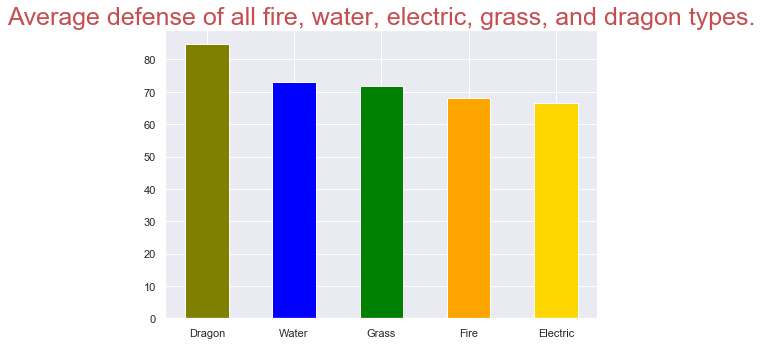

In [131]:
fireAvg = AverageOfType1(type1 = "Fire").AVG_Defense
waterAvg = AverageOfType1(type1 = "Water").AVG_Defense
grassAvg = AverageOfType1(type1 = "Grass").AVG_Defense
electricAvg = AverageOfType1(type1 = "Electric").AVG_Defense
dragonAvg = AverageOfType1(type1 = "Dragon").AVG_Defense

plt.figure(figsize=(12,8))

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])

ax.bar("Dragon", dragonAvg, color = 'olive', width = 0.5)
ax.bar("Water", waterAvg, color = 'blue', width = 0.5)
ax.bar("Grass", grassAvg, color = 'green', width = 0.5)
ax.bar("Fire", fireAvg, color = 'orange', width = 0.5)
ax.bar("Electric", electricAvg, color = 'gold', width = 0.5)
plt.title("Average defense of all fire, water, electric, grass, and dragon types.", fontsize=25, color='r')

**39. Create function that takes in one or both types and returns the average stats of pokemon of that/those types. (The default of type 2 is "None")**


In [121]:
def AverageOfType1And2(type1, type2="None"):
    
    typeFiltered_poke_df = poke_df.loc[(poke_df['Type_1'] == type1) & (poke_df['Type_2'] == type2)]
                         
    AVG_HP = typeFiltered_poke_df["HP"].mean()
    AVG_Attack = typeFiltered_poke_df["Attack"].mean()
    AVG_Defense = typeFiltered_poke_df["Defense"].mean()
    AVG_Sp_Atk = typeFiltered_poke_df["Sp_Atk"].mean()
    AVG_Sp_Def = typeFiltered_poke_df["Sp_Def"].mean()
    AVG_Speed = typeFiltered_poke_df["Speed"].mean()
    AVG_Total = typeFiltered_poke_df["Total"].mean()
    AVG_Stat_Avg = typeFiltered_poke_df["Stat_Avg"].mean()
                                       
    TypeAVG_df = pd.DataFrame({'Type_1':[type1],
                               'Type_2':[type2],
                               'AVG_HP':[AVG_HP],
                               'AVG_Attack':[AVG_Attack], 
                               'AVG_Defense':[AVG_Defense], 
                               'AVG_Sp_Atk':[AVG_Sp_Atk], 
                               'AVG_Sp_Def':[AVG_Sp_Def], 
                               'AVG_Speed':[AVG_Speed], 
                               'AVG_Total':[AVG_Total], 
                               'AVG_Stat_Avg':[AVG_Stat_Avg],
                              })
    
    TypeAVG_df = TypeAVG_df [['Type_1','Type_2','AVG_HP','AVG_Attack','AVG_Defense','AVG_Sp_Atk','AVG_Sp_Def','AVG_Speed','AVG_Total','AVG_Stat_Avg']];
    return TypeAVG_df

In [122]:
AverageOfType1And2(type1 = "Fire")

,Type_1,Type_2,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Fire,None,62.676471,79.088235,57.941176,72.529412,63.705882,74.705882,410.647059,68.058824


In [123]:
AverageOfType1And2("Fire","Ground")

,Type_1,Type_2,AVG_HP,AVG_Attack,AVG_Defense,AVG_Sp_Atk,AVG_Sp_Def,AVG_Speed,AVG_Total,AVG_Stat_Avg
0,Fire,Ground,66.666667,93.333333,70.0,105.0,75.0,31.666667,441.666667,73.0


**40. Create a function that returns the list of stats of one pokemon and average stats of some type.**

In [124]:
def compare_poke_and_avg_type(type1, name):
    
    type_AVG_HP = AverageOfType1(type1).AVG_HP
    type_AVG_Atk = AverageOfType1(type1).AVG_Attack
    type_AVG_Def = AverageOfType1(type1).AVG_Defense
    type_AVG_Sp_Atk = AverageOfType1(type1).AVG_Sp_Atk
    type_AVG_Sp_Def = AverageOfType1(type1).AVG_Sp_Def
    type_AVG_Spd = AverageOfType1(type1).AVG_Speed
    type_AVG_Tot = AverageOfType1(type1).AVG_Total
    type_AVG_Stat_Avg = AverageOfType1(type1).AVG_Stat_Avg
    
    
    HP = poke_df.loc[(poke_df['Name'] == name)].HP
    Atk = poke_df.loc[(poke_df['Name'] == name)].Attack
    Def = poke_df.loc[(poke_df['Name'] == name)].Defense
    Sp_Atk = poke_df.loc[(poke_df['Name'] == name)].Sp_Atk
    Sp_Def = poke_df.loc[(poke_df['Name'] == name)].Sp_Def
    Spd = poke_df.loc[(poke_df['Name'] == name)].Speed
    Tot = poke_df.loc[(poke_df['Name'] == name)].Total
    Stat_Avg = poke_df.loc[(poke_df['Name'] == name)].Stat_Avg
    
    
    ALL_AVG_HP = poke_df["HP"].mean()
    ALL_AVG_Atk = poke_df["Attack"].mean()
    ALL_AVG_Def = poke_df["Defense"].mean()
    ALL_AVG_Sp_Atk = poke_df["Sp_Atk"].mean()
    ALL_AVG_Sp_Def = poke_df["Sp_Def"].mean()
    ALL_AVG_Spd = poke_df["Speed"].mean()
    ALL_AVG_Tot = poke_df["Total"].mean()
    ALL_AVG_Stat_Avg = poke_df["Stat_Avg"].mean()
    
    

    builds =  np.array(["HP", "Atk", "Def", "Sp_Atk", "Sp_Def", "Spd", "Total", "Stat_Avg"])
    #builds = np.array([1, 2, 3, 4, 5, 6, 7, 8])
    y_stack = np.row_stack(([round(type_AVG_HP),    round(type_AVG_Atk), round(type_AVG_Def), round(type_AVG_Sp_Atk),
                             round(type_AVG_Sp_Def),round(type_AVG_Spd), round(type_AVG_Tot), round(type_AVG_Stat_Avg)],
                            
                            [round(HP),     round(Atk), round(Def), round(Sp_Atk), 
                             round(Sp_Def), round(Spd), round(Tot), round(Stat_Avg)],
                            
                           [round(ALL_AVG_HP), round(ALL_AVG_Atk), round(ALL_AVG_Def), round(ALL_AVG_Sp_Atk),
                           round(ALL_AVG_Sp_Def), round(ALL_AVG_Spd), round(ALL_AVG_Tot), round(ALL_AVG_Stat_Avg)])) 

    fig = plt.figure(figsize=(11,8))
    ax1 = fig.add_subplot(111)
    
    ax1.plot(builds, y_stack[0,:], label = type1 + "-type Average", color='red', marker='o')  
    ax1.plot(builds, y_stack[1,:], label = name, color='black', marker='o')
    ax1.plot(builds, y_stack[2,:], label = "All Pokemon AVG", color='blue', marker='o')
    
    
    for i,j in zip(builds,y_stack[0,:]):
        ax1.annotate('%s)' %j, xy=(i,j), xytext=(10,40), textcoords='offset points',color='red')
        #ax1.annotate('(%s,' %i, xy=(i,j))
        
    for i,j in zip(builds,y_stack[1,:]):
        ax1.annotate('%s)' %j, xy=(i,j), xytext=(10,15), textcoords='offset points',color='black')     
        
    for i,j in zip(builds,y_stack[2,:]):
        ax1.annotate('%s)' %j, xy=(i,j), xytext=(10,15), textcoords='offset points',color='blue')    
        
        
    

    plt.xticks(builds)
    plt.xlabel('Builds')
    plt.title("Type, pokemon, and all average line graph", fontsize= 14, color = "black")

    handles, labels = ax1.get_legend_handles_labels()
    ax1.grid('on')
    return ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))


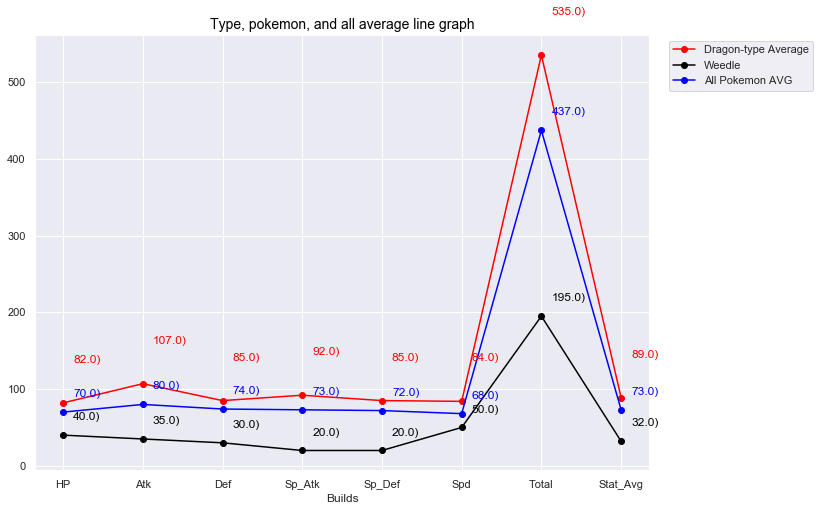

In [125]:
compare_poke_and_avg_type("Dragon", "Weedle")

**41. Create a function that return the top of a percentage from a stat and optional type.**

In [126]:
def top_perc (percent, stat, type1 = None):
    n = percent
    
    if type1 is None:
        stat_poke_df = poke_df.sort_values(stat, ascending=False)
        final_poke_df = stat_poke_df.head(int(len(stat_poke_df)*(n/100.0)))
        return final_poke_df
    else:
        type_poke_df =  poke_df[poke_df['Type_1'] == type1]
        stat_type_poke_df = type_poke_df.sort_values(stat, ascending=False)
        final_poke_df = stat_type_poke_df.head(int(len(stat_type_poke_df)*(n/100.0)))
        return final_poke_df

In [127]:
top_perc(10, "HP","Fire")

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
291,244,Entei,"[Fire, None]",Fire,None,115,115,85,90,75,100,580,96
592,500,Emboar,"[Fire, Fighting]",Fire,Fighting,110,123,65,100,65,65,528,88
298,250,Ho-oh,"[Fire, Flying]",Fire,Flying,106,130,90,110,154,90,680,113
651,555,Darmanitan Zen Mode,"[Fire, Psychic]",Fire,Psychic,105,30,105,140,105,55,540,90
650,555,Darmanitan Standard Mode,"[Fire, None]",Fire,None,105,140,55,30,55,95,480,80
983,851,Centiskorch,"[Fire, Bug]",Fire,Bug,100,115,65,90,90,65,525,87


In [128]:
top_perc(1, "Speed")

,NationalNo,Name,Type,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total,Stat_Avg
464,386,Deoxys Speed Forme,"[Psychic, None]",Psychic,None,50,95,90,95,90,180,600,100
345,291,Ninjask,"[Bug, Flying]",Bug,Flying,61,90,45,50,50,160,456,76
923,795,Pheromosa,"[Bug, Fighting]",Bug,Fighting,71,137,37,137,37,151,570,95
131,101,Electrode,"[Electric, None]",Electric,None,60,50,70,80,80,150,490,81
462,386,Deoxys Attack Forme,"[Psychic, None]",Psychic,None,50,180,20,180,20,150,600,100
181,142,Mega Aerodactyl,"[Rock, Flying]",Rock,Flying,80,135,85,70,95,150,615,102
461,386,Deoxys Normal Forme,"[Psychic, None]",Psychic,None,50,150,50,150,50,150,600,100
84,065,Mega Alakazam,"[Psychic, None]",Psychic,None,55,50,65,175,105,150,600,100
1023,888,Zacian Crowned Sword,"[Fairy, Steel]",Fairy,Steel,92,170,115,80,115,148,720,120
19,015,Mega Beedrill,"[Bug, Poison]",Bug,Poison,65,150,40,15,80,145,495,82


**TODO:
1. percentages of pokemon with grass/fire/water as primary vs secondary
3. function accepts a types and ouptus a list of all its secondary combinations
4. total # of pokemon of the type found in AverageOfType1 function return.
5. random number to pokemon no to pentagon graph.
7. Add styling/titles to other graphs**